# Reading the Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set()

In [4]:
df=pd.read_csv("diabetes1.csv")

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### It seems in the minumum there are values of zero which we need to deal with later

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### It seems that all features are continuous numbers/integers (no categorical)

In [9]:
df.rename(columns ={"DiabetesPedigreeFunction":"DPF"},inplace=True)

#### We rename the Diabetes Pedigree Function feature to DPF in order to shorten it for easier use

In [10]:
df.drop_duplicates().shape

(768, 9)

#### It seems that there are no duplicates as number of observations of the data did not change

# Statistical Distribution

In [11]:
counts = df['Outcome'].value_counts()
counts

0    500
1    268
Name: Outcome, dtype: int64

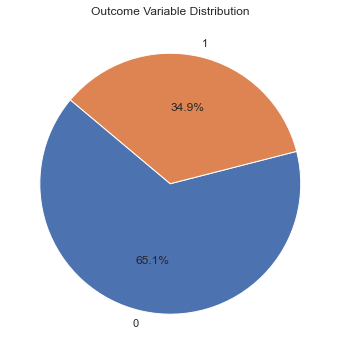

In [12]:
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Outcome Variable Distribution')
plt.show()

#### As shown from the outcome variable distriution there is a class imbalance as the class with label 0 has 500 observations which represents 65.1% from the data and the class with label 1 has 268 observations which represents 34.9% from the data.

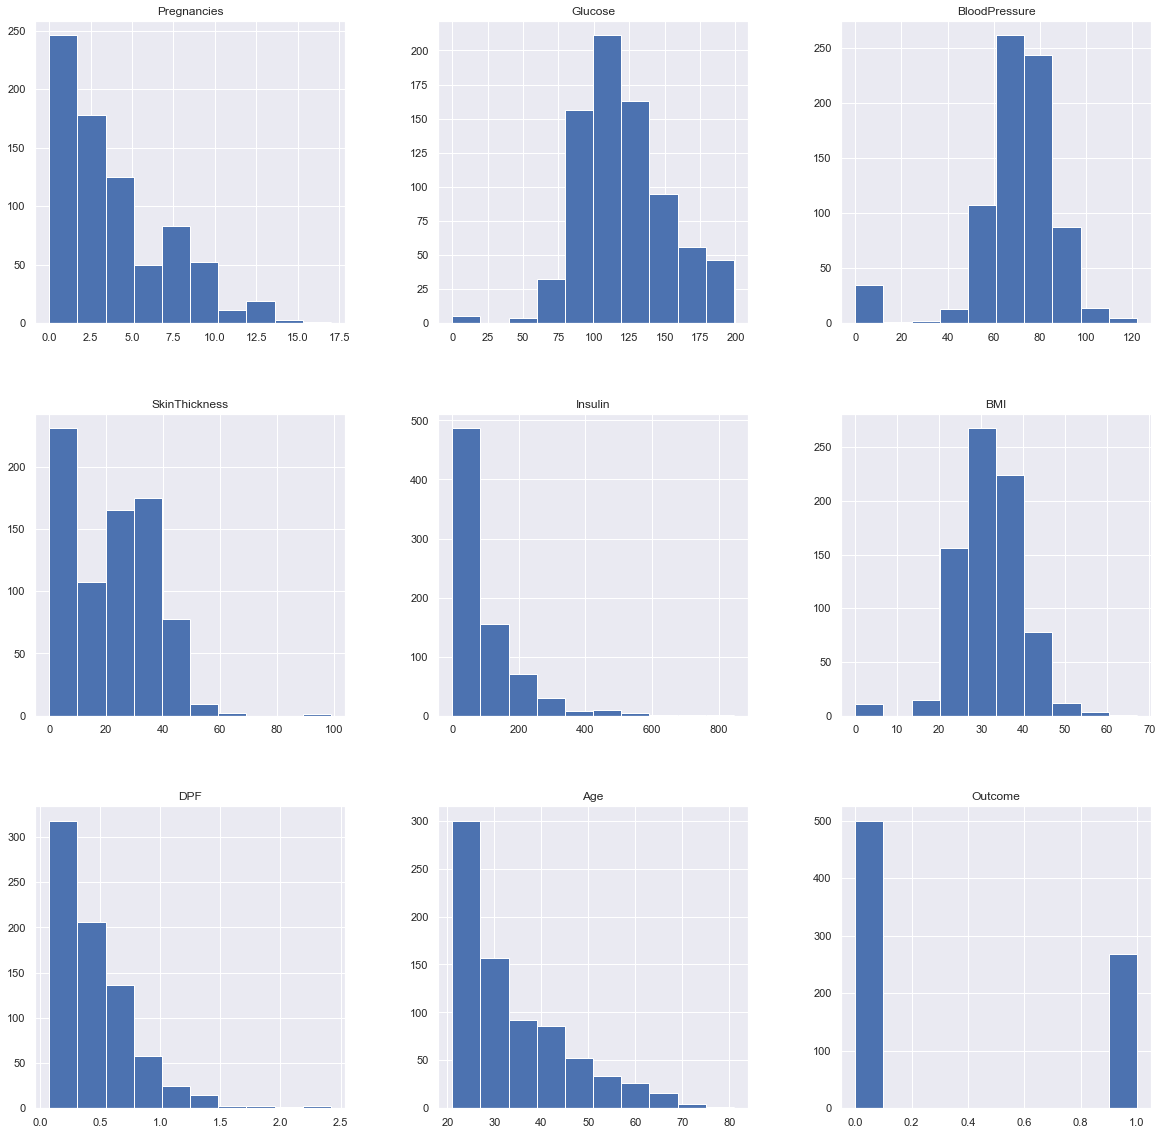

In [13]:
hist = df.hist(figsize = (20,20))

## Box Plots for Numerical Variables

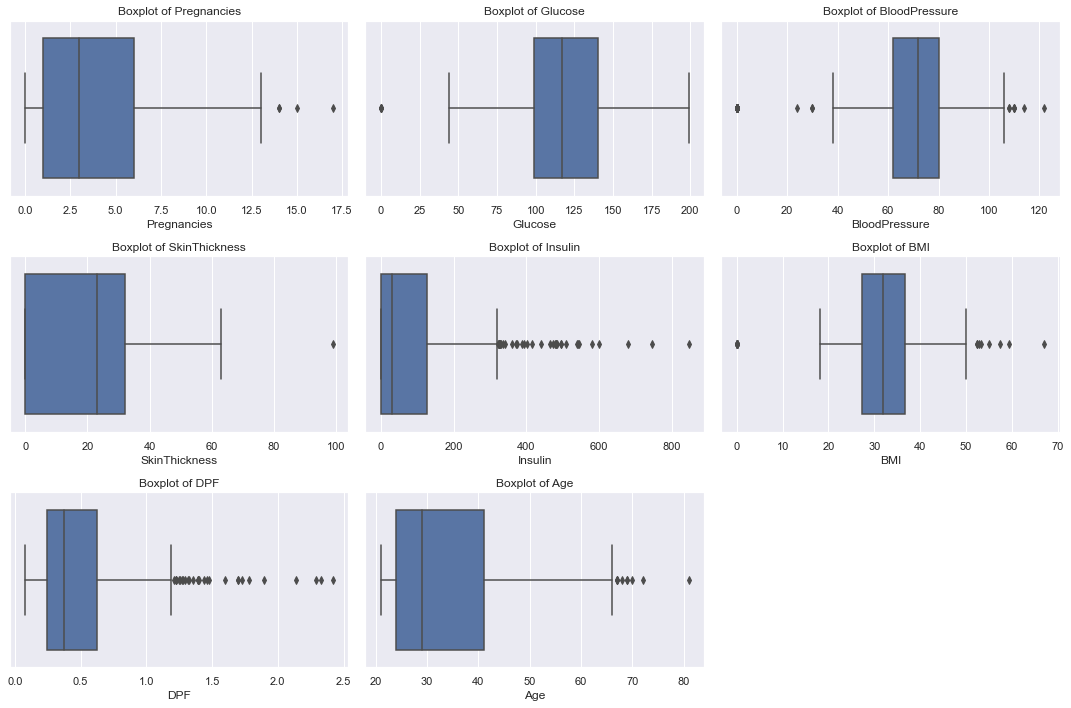

In [14]:
numerical_columns = df.columns[:-1]
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

#### As shown from the Boxplots there are some outliers in each variable as any points below the minimum or above the maximum are considered outliers

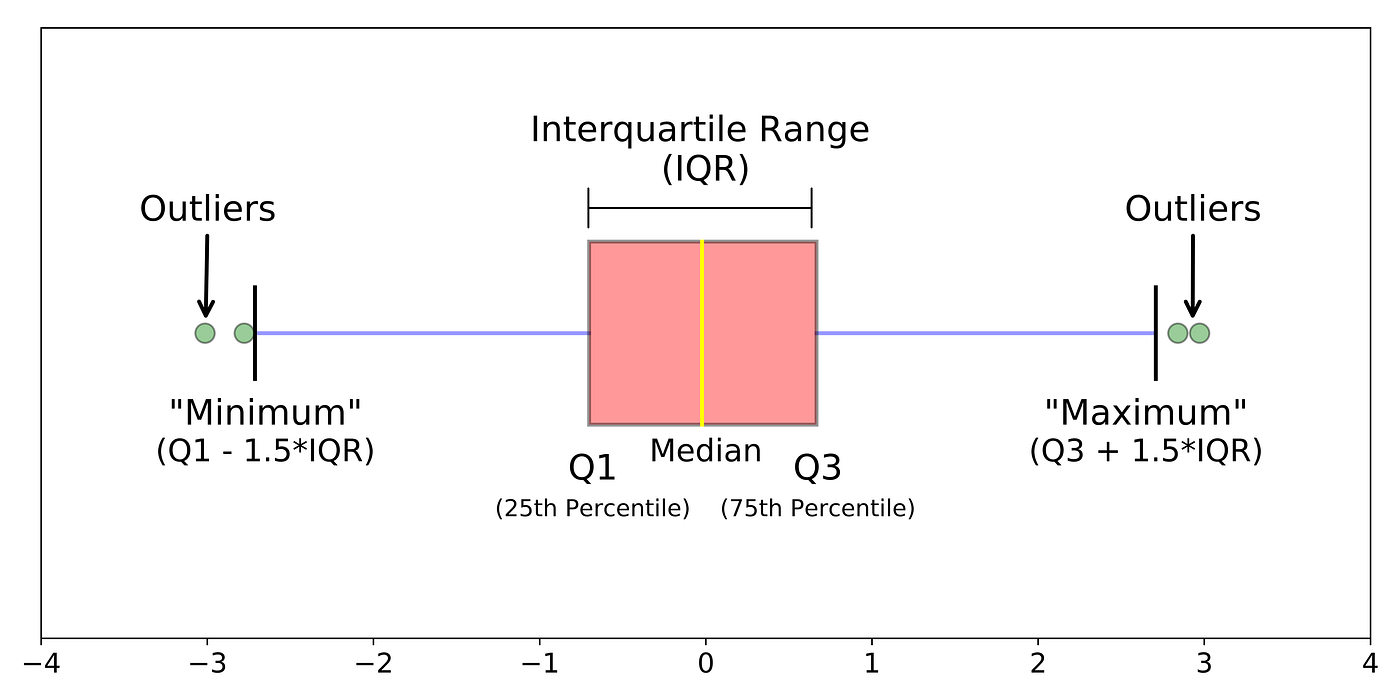

## Boxplot by Outcome Variable

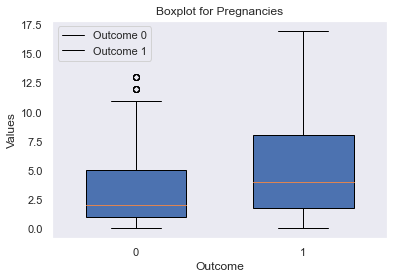

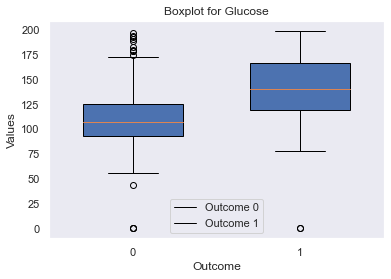

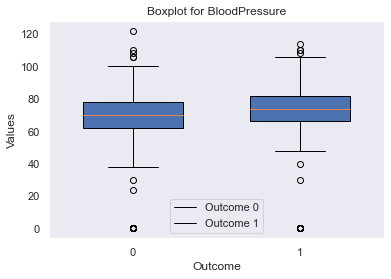

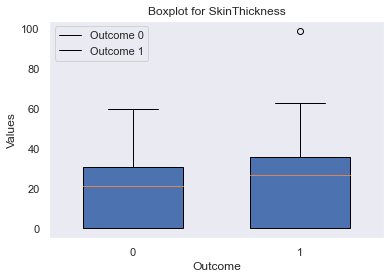

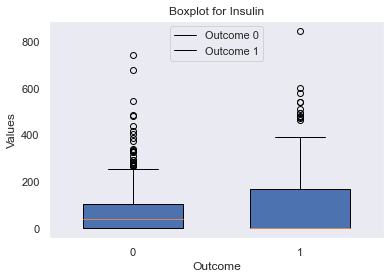

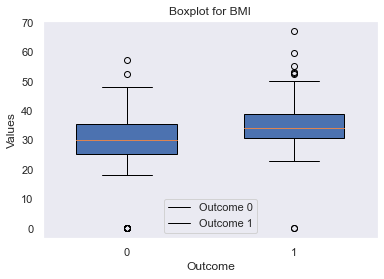

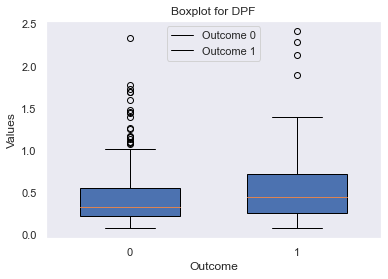

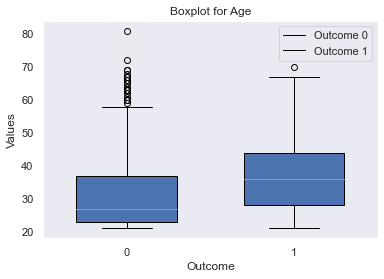

In [15]:
# Grouping DataFrame by outcome variable
groups = df.groupby('Outcome')

# Plotting boxplots for each variable
for variable in df.columns[:-1]:  # Exclude the outcome variable
    plt.figure(figsize=(6, 4))
    for outcome, group in groups:
        plt.boxplot(group[variable], positions=[outcome], widths=0.6, patch_artist=True)
    plt.title(f'Boxplot for {variable}')
    plt.xlabel('Outcome')
    plt.ylabel('Values')
    plt.xticks([0, 1], ['0', '1'])
    plt.grid(False)
    plt.legend(['Outcome 0', 'Outcome 1'])
    plt.show()

#### As shown from the Boxplots grouped by outcome, there are some outliers for both classes in each variable, but we can see that class with label zero has more outliers and this could be due to that this class has more observations than the other class. 

# Missing Values

In [16]:
import missingno as msno
msno.matrix(df, color=(0.3, 0.7, 0.8))

ModuleNotFoundError: No module named 'missingno'

In [ ]:
df.isnull().sum()

#### There are no missing values.

# Correlation with Target Feature "Outcome"

Text(0.5, 1.0, 'Correlation Plot')

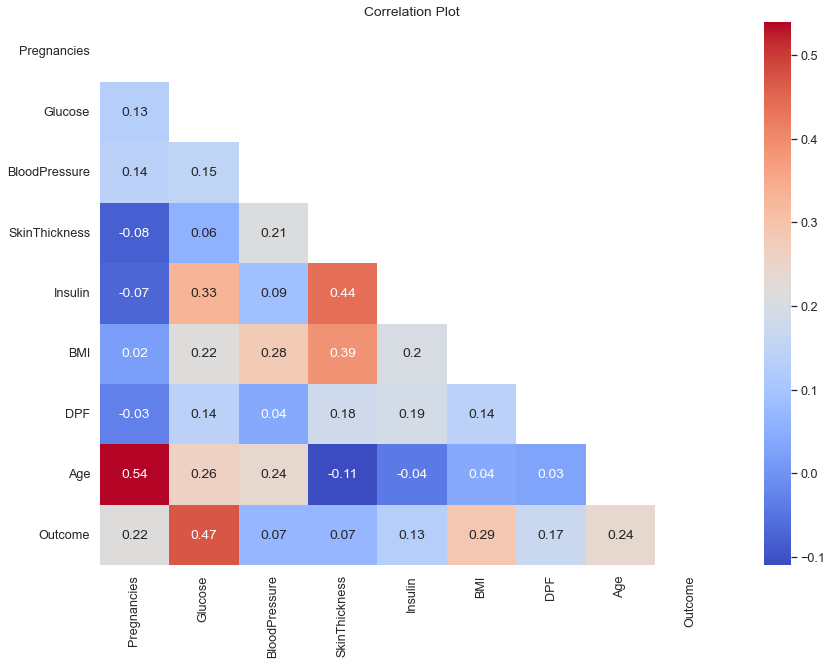

In [17]:
corr=df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='coolwarm',mask=mask,cbar=True)
plt.title('Correlation Plot')

<Figure size 720x576 with 0 Axes>

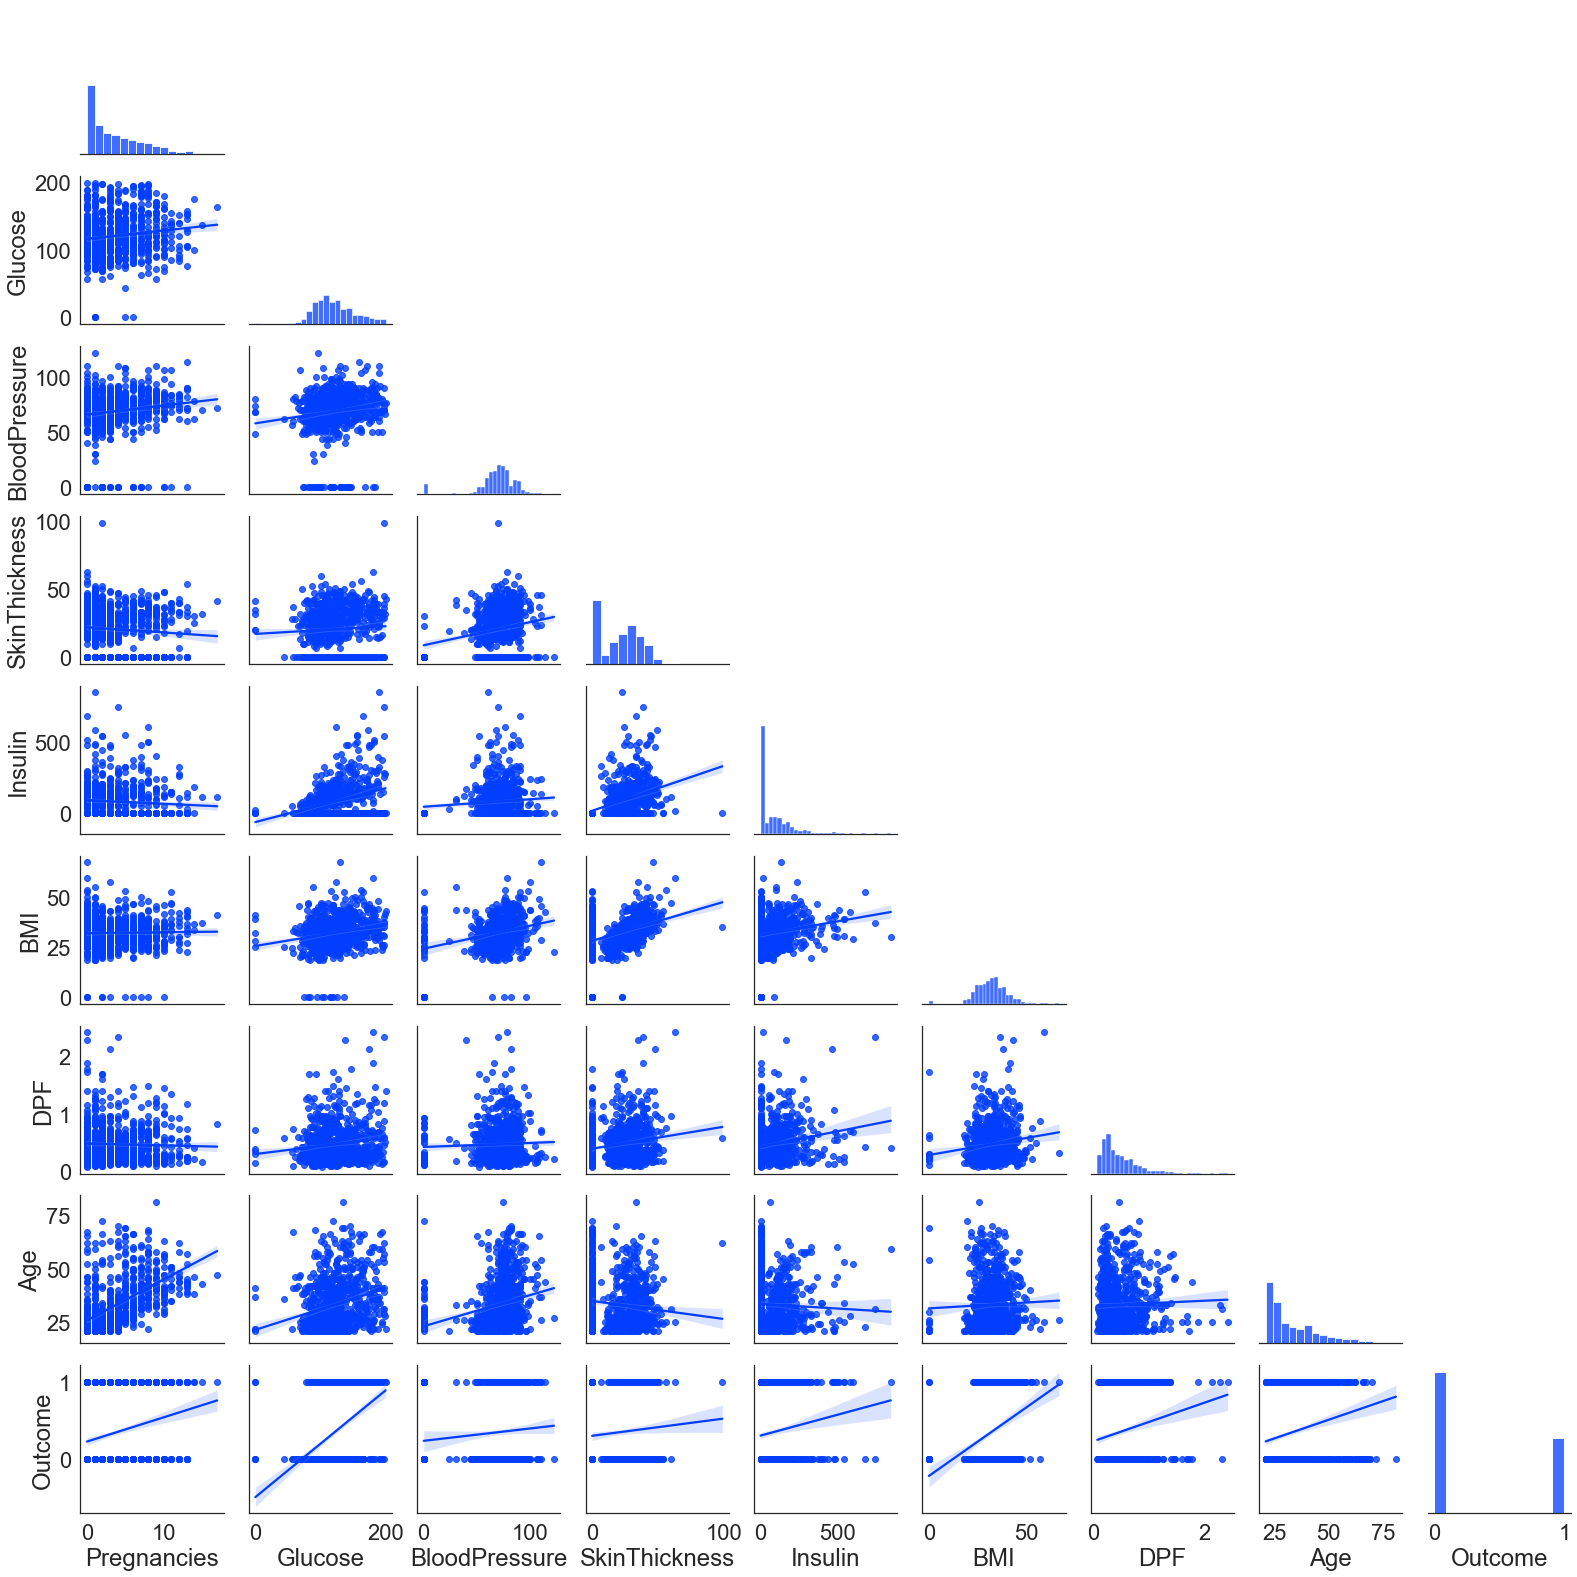

In [18]:
sns.set(font_scale=2)
plt.figure(figsize=(10, 8))
sns.set_style("white")
sns.set_palette("bright")
sns.pairplot(df,kind = 'reg',corner = True,palette ='YlGnBu' )

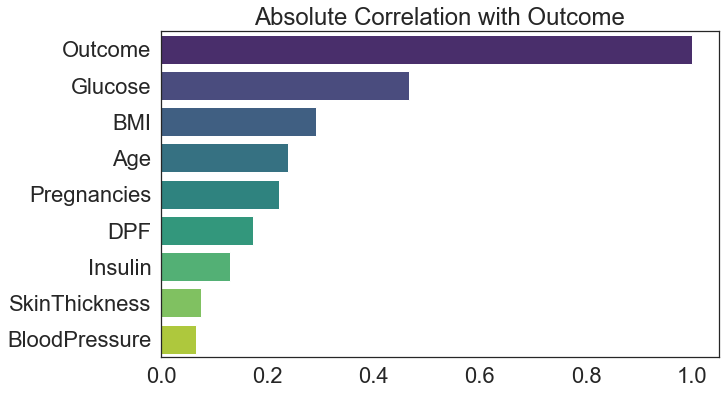

In [19]:
correlation_matrix = df.corr()

sorted_corr_abs = correlation_matrix["Outcome"].abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr_abs.values, y=sorted_corr_abs.index, palette="viridis")
plt.title("Absolute Correlation with Outcome")
plt.show()


<span style="color:Green"> **Observation:**
* The correlation between Outcome and Glucose is high. Glucose seems to be the most important feature in model training.
* BMI, Pregnancies, and Age are also expected to be used as important features in model training.
* High correlation coefficient with SkinThickness and BMI. This might create a multicollinearity problem.

# Checking Class Imbalance for the Target Class "Outcome"

In [ ]:
import plotly.graph_objects as go
colors = ['skyblue', 'orange']
labels = ['0','1']
values = df['Outcome'].value_counts()/df['Outcome'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

#### It seems there is no large class imbalance for the target class.

# Checking and treating Outliers

We plot our feautures without the target feauture (Outcome) to observe outliers

In [20]:
feature_names = [cname for cname in df.loc[:,:'Age'].columns]

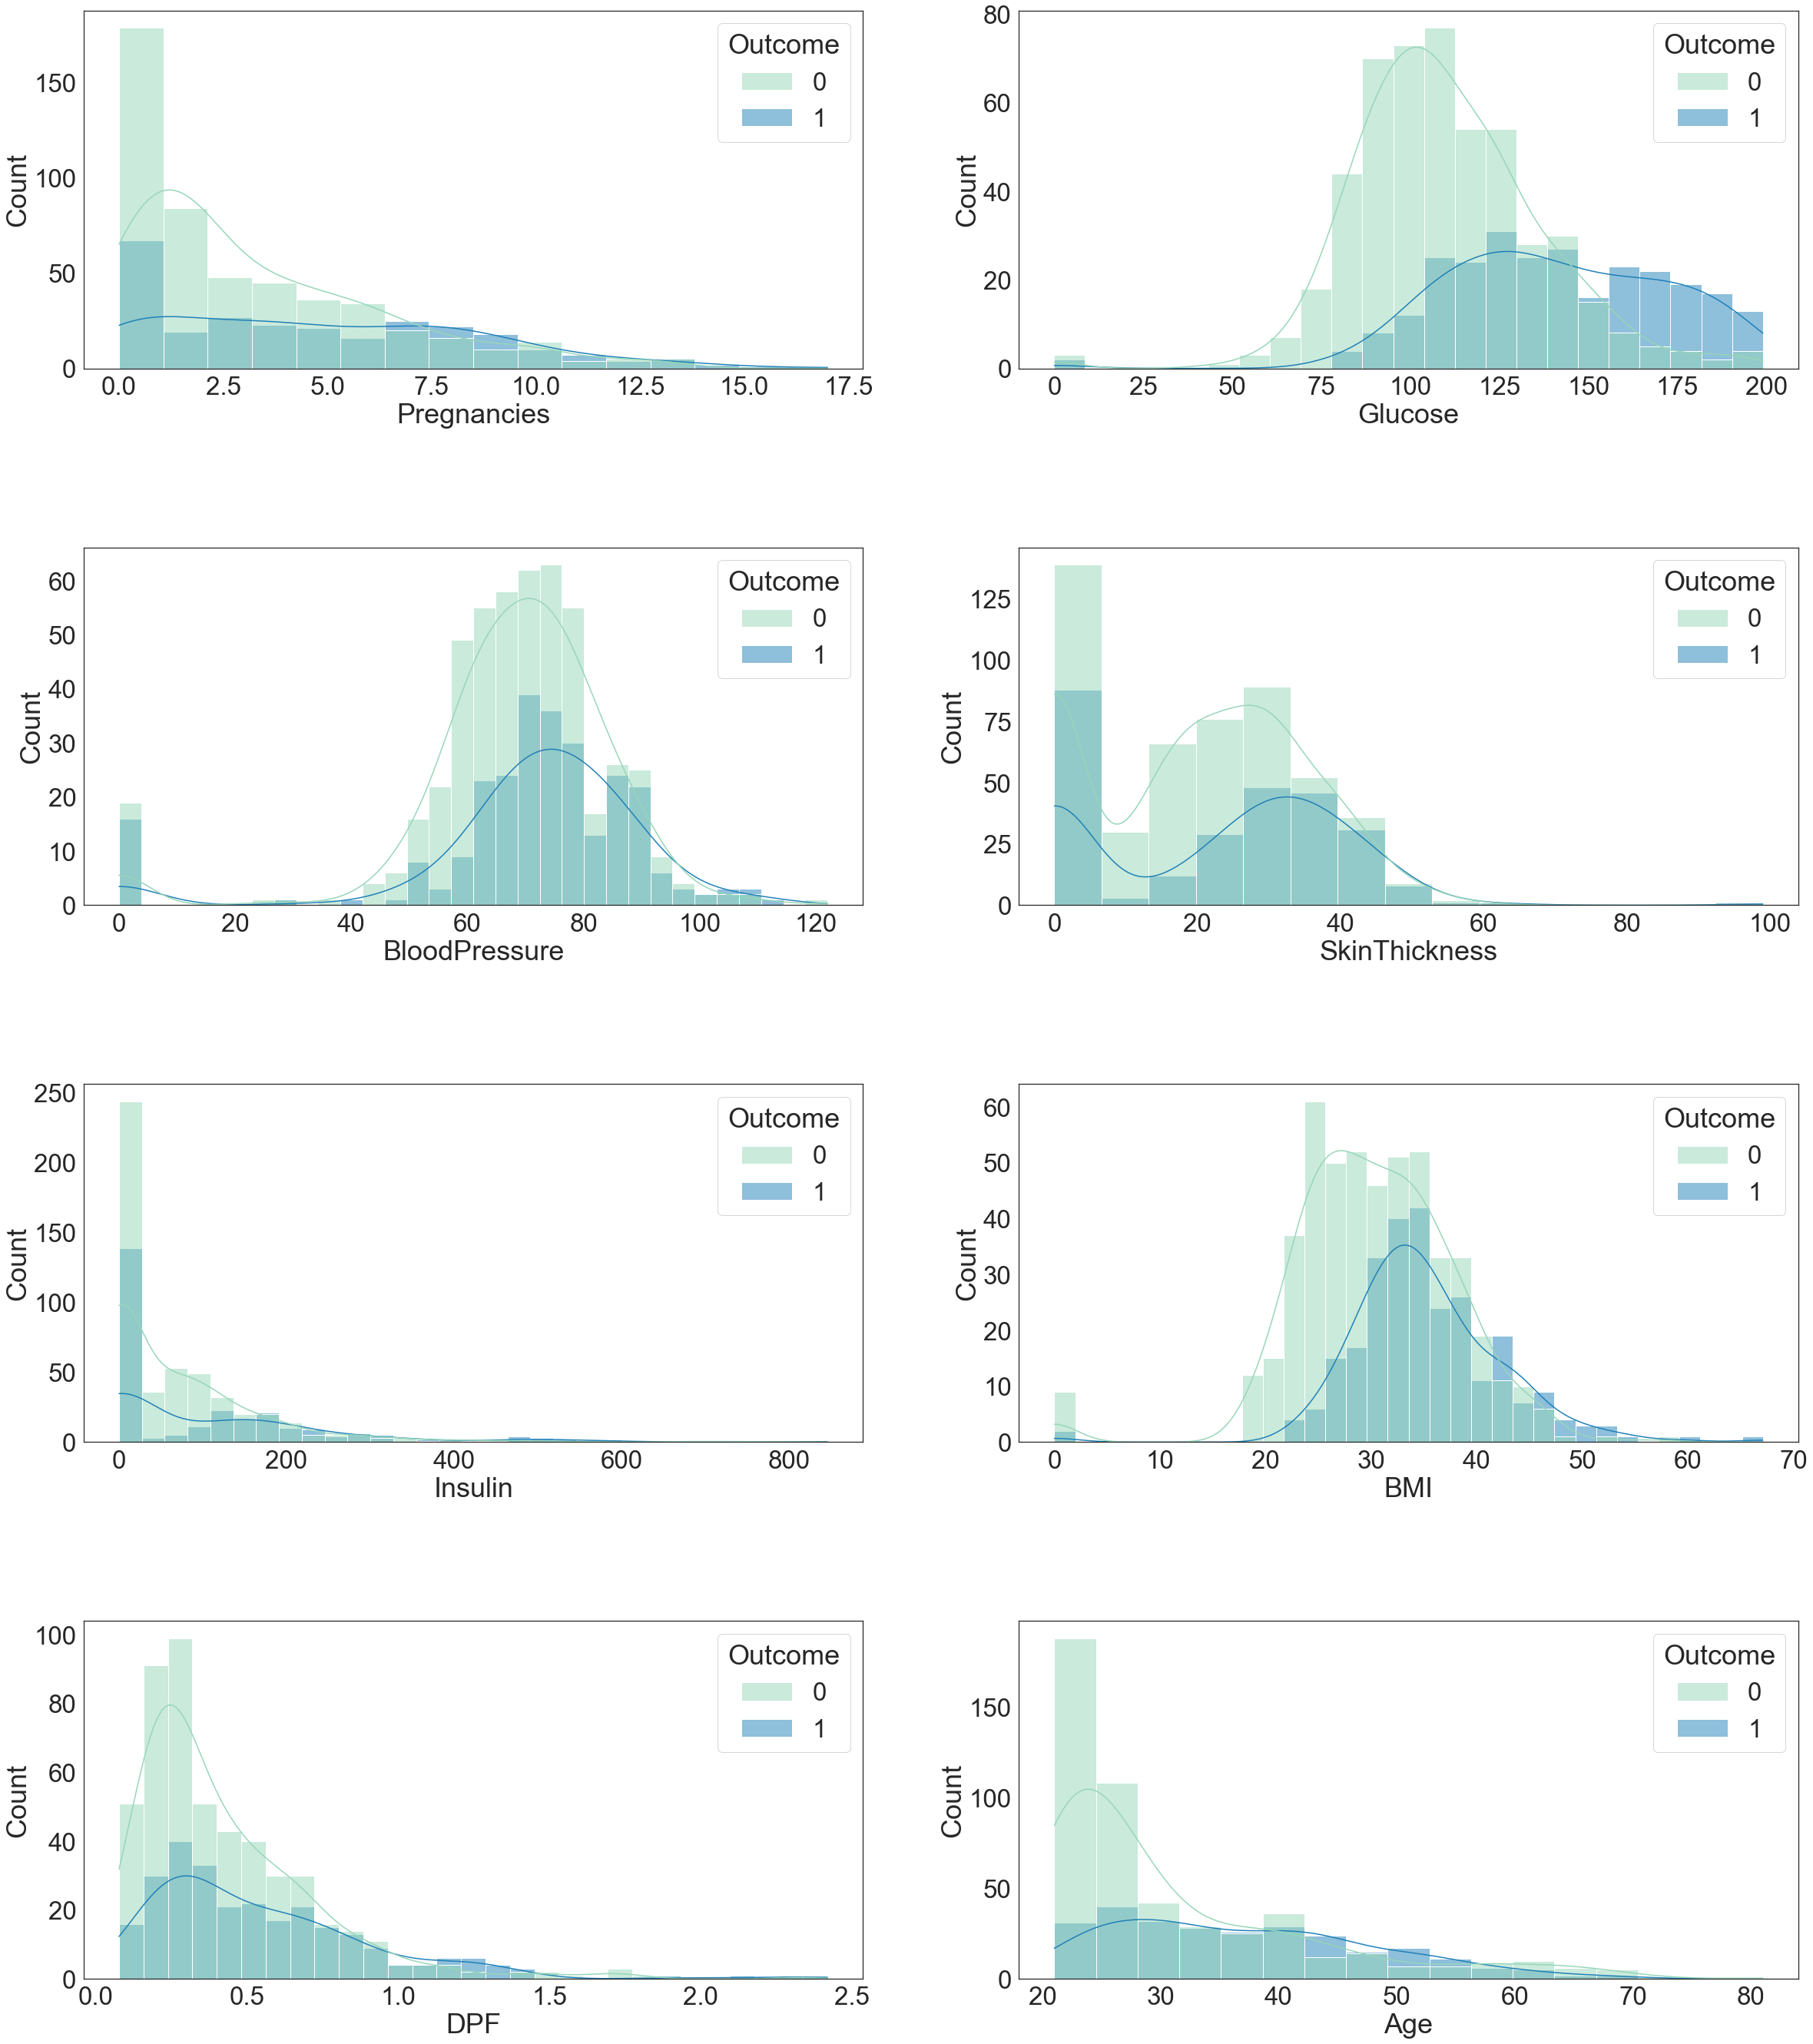

In [21]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

#### It seems that there are a lot of features that have 0 values and these should be treated as outliers. Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed.

Number of zero values in each column:

In [22]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


#### It seems that there are zero values in the above 5 features, and since they do not make sense in our analysis they need to be treated. It isn't medically possible for these data records to have 0 value (such as Blood Pressure, Glucose levels, BMI). Hence we replace them with the mean/median value of that particular column.
#### We will treat the 5 features: Insulin, Glucose, Skin Thickness, Blood Pressure, and BMI

In [23]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure',
                                                                      'SkinThickness','Insulin','BMI']].replace(0,np.NaN)

#### all zero values are encoded with NaN value

In [24]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [25]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


#### Insulin's medians by the target are really different, 102.5 for a healthy person and 169.5 for a diabetic person.
#### Therefore we need to replace the NaN values accordingly (and same for the next 4 features).

In [26]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

In [27]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [28]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

In [29]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [30]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [31]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [32]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [33]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [34]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

In [35]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

0
0
0
0
0


#### Now we do not have zero values.

# Adding New Features

In [36]:
df['BMIxThickness'] = df['BMI'] * df['SkinThickness']

df['Preg/Age'] =  df['Pregnancies'] / df['Age']

df['Age/Insulin'] = df['Age'] / df['Insulin']

df['BMIxAge'] = df['BMI'] * df['Age']

Text(0.5, 1.0, 'Correlation Plot')

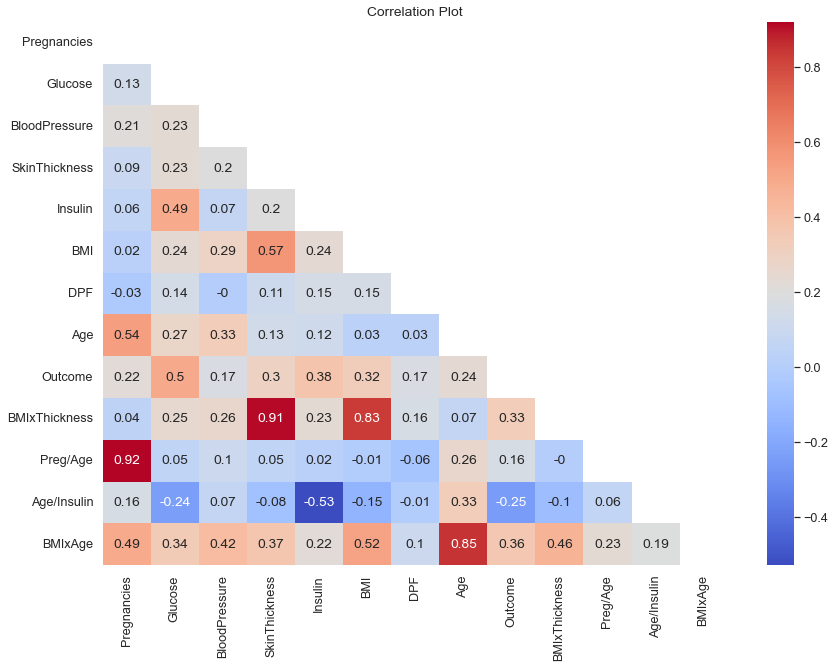

In [37]:
corr=df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='coolwarm',mask=mask,cbar=True)
plt.title('Correlation Plot')

#### We inserted new features and they seem to have stronger correlations so they might be better used for prediction. 

#### We will sort the correlation to observe which features have the strongest relation to Outcome:

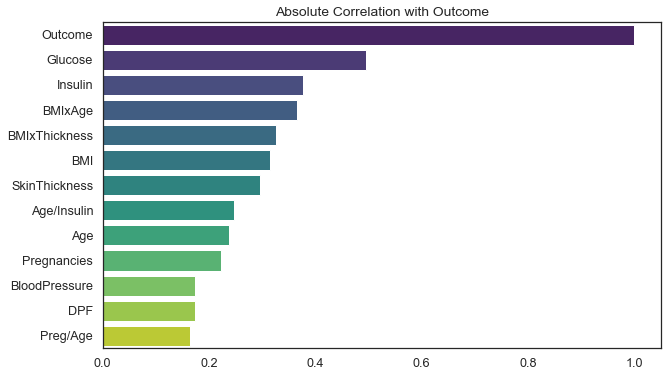

In [38]:
correlation_matrix = df.corr()

sorted_corr_abs = correlation_matrix["Outcome"].abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr_abs.values, y=sorted_corr_abs.index, palette="viridis")
plt.title("Absolute Correlation with Outcome")
plt.show()


# Features Selection according to semantic importance / relevance

#### Extra Trees can be used to estimate the importance of features.

In [39]:
from sklearn.model_selection import train_test_split

df_clean_name = df.columns
X_c = df.drop('Outcome', axis=1)  # Use iloc to select columns by index
Y_c = df['Outcome']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, Y_c,
                                                            test_size=0.25,
                                                            random_state=0,
                                                            stratify=df['Outcome'])


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=7)

clf.fit(X_train_c, y_train_c)

# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#### Best K Features can also be used to select the best features.

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=df['Outcome'])

# Use SelectKBest with chi2 for feature selection
k_features = 7  # Specify the number of features to select
X_train_selected = SelectKBest(chi2, k=k_features).fit_transform(X_train, y_train)
X_test_selected = SelectKBest(chi2, k=k_features).fit_transform(X_test, y_test)

print(f"Original shape of X_train: {X_train.shape}")
print(f"Shape of X_train after feature selection: {X_train_selected.shape}")
print(f"Original shape of X_test: {X_test.shape}")
print(f"Shape of X_test after feature selection: {X_test_selected.shape}")


In [ ]:
selector = SelectKBest(chi2, k=k_features).fit(X_train, y_train)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X.columns[selected_features_indices]

print(f"Selected features: {selected_features_names}")

In [40]:
df_feature_imp=df[['Pregnancies','Glucose','SkinThickness','Insulin','Age','BMIxThickness','BMIxAge','Outcome']]

In [41]:
df_feature_imp.shape

(768, 8)

In [45]:
df_feature_imp.describe()

,Pregnancies,Glucose,SkinThickness,Insulin,Age,BMIxThickness,BMIxAge,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000
mean,3.845052,121.677083,29.089844,141.753906,33.240885,978.102734,1080.40651,0.348958
std,3.369578,30.464161,8.890820,89.100847,11.760232,453.893312,437.98205,0.476951
min,0.000000,44.000000,7.000000,14.000000,21.000000,137.200000,382.20000,0.000000
25%,1.000000,99.750000,25.000000,102.500000,24.000000,664.575000,743.32500,0.000000
50%,3.000000,117.000000,28.000000,102.500000,29.000000,923.700000,989.35000,0.000000
75%,6.000000,140.250000,32.000000,169.500000,41.000000,1202.725000,1357.20000,1.000000
max,17.000000,199.000000,99.000000,846.000000,81.000000,3742.200000,2697.00000,1.000000


In [42]:
df_feature_imp[df_feature_imp['Outcome'] == 1].describe()

,Pregnancies,Glucose,SkinThickness,Insulin,Age,BMIxThickness,BMIxAge,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.302239,32.671642,187.615672,37.067164,1180.235448,1298.463433,1.0
std,3.741239,29.488811,8.469178,94.114420,10.968254,460.252206,406.209955,0.0
min,0.000000,78.000000,7.000000,14.000000,21.000000,193.200000,526.700000,1.0
25%,1.750000,119.000000,30.000000,169.500000,28.000000,934.350000,967.875000,1.0
50%,4.000000,140.000000,32.000000,169.500000,36.000000,1088.050000,1275.800000,1.0
75%,8.000000,167.000000,36.000000,169.500000,44.000000,1372.800000,1543.875000,1.0
max,17.000000,199.000000,99.000000,846.000000,70.000000,3742.200000,2579.500000,1.0


In [43]:
df_feature_imp[df_feature_imp['Outcome'] == 0].describe()

,Pregnancies,Glucose,SkinThickness,Insulin,Age,BMIxThickness,BMIxAge,Outcome
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,110.62200,27.170000,117.172000,31.190000,869.759600,963.528000,0.0
std,3.017185,24.70392,8.516935,75.685302,11.667655,411.845028,409.070915,0.0
min,0.000000,44.00000,7.000000,15.000000,21.000000,137.200000,382.200000,0.0
25%,1.000000,93.00000,22.000000,95.000000,23.000000,591.300000,649.750000,0.0
50%,2.000000,107.00000,27.000000,102.500000,27.000000,804.600000,860.400000,0.0
75%,5.000000,125.00000,31.000000,105.000000,37.000000,1058.600000,1156.550000,0.0
max,13.000000,197.00000,60.000000,744.000000,81.000000,2808.000000,2697.000000,0.0


In [44]:
df2 = pd.DataFrame(df_feature_imp)

# Save the dataframe to a CSV file
df2.to_csv('diabetes_cleaned.csv', index=False)

#### Extra Trees and Best K Features produced slightly different results, we will choose to follow the Best K features selection

#### It seems that the features Pregnancies, Glucose, Insulin, SkinThickness, Age, BMIxThickness, and BMIxAge had the highest relative importance and therefore were selected to our final clean dataset